In [1]:
%run Funciones.ipynb

In [9]:
%run ParserMaterias.ipynb

In [10]:
get_recommendations("topologia ecuaciones diferenciales")

[162, 765, 183, 165, 766, 395, 433, 163, 712, 939]

In [11]:
def get_recomendations_str(intereses):
    '''
    Dado una cadena con los intereses de alguna persona, regresa el nombre
    de las materias que le recomienda.
    ----------------------------------------------------------
    :param intereses str: Cadena que tiene intereses del alumno
    :returns [str]: Lista con materias a considerar
    '''
    recomendaciones = []
    recomendaciones_num = get_recommendations(intereses)
    for recomendacion in recomendaciones_num:
        try:
            recomendaciones.append((clave_to_nombre(recomendacion),str_to_clave(recomendacion)))
        except Exception as e:
            pass
    return recomendaciones

In [12]:
get_recomendations_str('topologia ecuaciones diferenciales')

[('ecuaciones diferenciales i', '0162'),
 ('topologia i', '0765'),
 ('ecuaciones diferenciales parciales ii', '0183'),
 ('ecuaciones diferenciales parciales i', '0165'),
 ('topologia ii', '0766'),
 ('ecuaciones diferenciales ii', '0163'),
 ('seminario de topologia b', '0712')]

In [13]:
lista = ['a','b']
lista.remove('a')
lista

['b']

In [14]:
lista = ['a','b']
random.shuffle(lista)
lista

['a', 'b']

In [15]:


def conjunto_se_intersecta(grupos):
    '''
    Dado un conjunto de grupos, comprueba si los horarios
    de los grupos se intersectan
    -------------------------------------------------
    :param grupos [str]: Lista de grupos
    
    :return Bool: Indicador de si los conjuntos se intersectan o no.
    '''
    dias = ['lu','ma','mi','ju','vi','sa']
    primer_horario = grupo_info(grupos[0])[2]
    horario = {dia:{} for dia in dias}
    
    for dia, hora in primer_horario.items():
        horario[dia][hora] = grupos[0]
    
    for grupo in grupos[1:]:
        horario_materia = grupo_info(grupo)[2]
        if se_intersecta_semana(horario_materia,horario):
            return True, horario
        for dia, hora in horario_materia.items():
            horario[dia][hora] = grupo

    return False, horario
conjunto_se_intersecta(['4171','4172'])

(False,
 {'lu': {(15.0, 16.0): '4171', (19.0, 20.0): '4172'},
  'ma': {(15.0, 16.0): '4171', (19.0, 20.0): '4172'},
  'mi': {(15.0, 16.0): '4171', (19.0, 20.0): '4172'},
  'ju': {(15.0, 16.0): '4171', (19.0, 20.0): '4172'},
  'vi': {(15.0, 16.0): '4171', (19.0, 20.0): '4172'},
  'sa': {}})

In [16]:
def crear_horario(claves,hora_inicio,hora_fin,seed=None):
    '''
    Dada una lista de claves y hora de inicio y fin de un horario deseado,
    regresa un diccionario con el horario de esas materias, así como
    una lista de (clave,grupo) en caso de que sea posible formar el horario,
    en caso contrario, regresa Falso
    ----------------------------------------------------------------
    :param claves [str]: Lista de claves
    :param hora_inicio float: Hora de inicio de las clases representadas
                             en horas u horas y media (XX.0, XX.5)
    :param hora_fin float: Hora de fin de las clases representadas
                             en horas u horas y media (XX.0, XX.5)
    :param seed int: Semilla para la elección de grupos, en caso de no ser especificada,
                    la elección de grupos será aleatoria
    
    :returns False: En caso de no haber una combinación posible
    :returns horario dict: Diccionario con los días y las horas en que se tiene cada
                        materia. Ejem:
                        {'lu': {(9.0, 10.0): '4175', (8.0, 9.0): '4112'},
                          'ma': {(9.0, 10.0): '4175', (8.0, 9.0): '4112'},
                          'mi': {(9.0, 10.0): '4175', (8.0, 9.0): '4112'},
                          'ju': {(9.0, 10.0): '4175', (8.0, 9.0): '4112'},
                          'vi': {(9.0, 10.0): '4175', (8.0, 9.0): '4112'},
                          'sa': {}}
    :returns [(clave,grupo)]: Lista con las claves y grupos que se eligieron. 
                            Ejem: [('0001', '4175'), ('0005', '4112')]
    '''
    if hora_inicio%0.5 != 0:
        raise Exception('Ese no es un horario válido, tiene que representar una hora o \n fracción de media hora')
        
    if seed is None:
        seed = random.randint(0,2**10)
    random.seed(seed)
    random.shuffle(claves)
    
    candidatos = generar_candidatos_semana(claves,hora_inicio,hora_fin)
    candidatos_por_clave = candidatos[2]
    for dia in candidatos_por_clave.keys():
        if candidatos_por_clave[dia] == []:
            return False #En caso de que no sea posible acomodar algún horario
        random.shuffle(candidatos_por_clave[dia])
    
    grupos = list(candidatos_por_clave.values())
    combinaciones = list(itertools.product(*grupos))
    for comb in combinaciones:
        if not conjunto_se_intersecta(comb)[0]:
            return conjunto_se_intersecta(comb)[1], list(zip(claves,comb))
    return False

crear_horario(['0766','0001'],8,13)

({'lu': {(11.0, 12.0): '4179', (10.0, 11.0): '4316'},
  'ma': {(11.0, 12.0): '4179', (10.0, 11.0): '4316'},
  'mi': {(11.0, 12.0): '4179', (10.0, 11.0): '4316'},
  'ju': {(11.0, 12.0): '4179', (10.0, 11.0): '4316'},
  'vi': {(11.0, 12.0): '4179', (10.0, 11.0): '4316'},
  'sa': {}},
 [('0001', '4179'), ('0766', '4316')])

In [23]:
with open('ciencias_horarios/semestres/1.json') as archivo:
    primer_sem = json.load(archivo)
with open('ciencias_horarios/semestres/2.json') as archivo:
    segundo_sem = json.load(archivo)
with open('ciencias_horarios/semestres/3.json') as archivo:
    tercer_sem = json.load(archivo)
with open('ciencias_horarios/semestres/4.json') as archivo:
    cuarto_sem = json.load(archivo)
with open('ciencias_horarios/semestres/5.json') as archivo:
    quinto_sem = json.load(archivo)
with open('ciencias_horarios/semestres/6.json') as archivo:
    sexto_sem = json.load(archivo)
with open('ciencias_horarios/semestres/op1.json') as archivo:
    optativas_1 = json.load(archivo)
with open('ciencias_horarios/semestres/op2.json') as archivo:
    optativas_2 = json.load(archivo)
with open('ciencias_horarios/semestres/op3.json') as archivo:
    optativas_3 = json.load(archivo)

In [25]:
"""
ESTO ES PARA VER COMO DEBEN IR LOS NODOS EN LATEX. EN CASO DE PASAR A LATEX
\node[a1] at (1,16) {VisualInfo};
\node[a1] at (4,16) {VisualInfo};
\node[a1] at (5,16) {VisualInfo};
\node[a1] at (4,17) {VisualInfo};
\node[a1] at (5,17) {VisualInfo};
"""

'\nESTO ES PARA VER COMO DEBEN IR LOS NODOS EN LATEX. EN CASO DE PASAR A LATEX\n\node[a1] at (1,16) {VisualInfo};\n\node[a1] at (4,16) {VisualInfo};\n\node[a1] at (5,16) {VisualInfo};\n\node[a1] at (4,17) {VisualInfo};\n\node[a1] at (5,17) {VisualInfo};\n'

In [19]:
def horario_toStr(horario):
    latex = ""
    if horario == False:
        print("Lo siento, no fue posible crear un horario con estas materias")
    else:
        print("Creamos el siguiente horario con los siguientes grupos:\n")
        for materia in horario[1]:
            print("~~."*12,'\n',
                  f"{clave_to_nombre(materia[0]).capitalize()}\n",
                  f"Grupo {materia[1]}",
                  f"Profesor(a):{grupo_info(materia[1])[1].title()}")
        
        print("\n .-.-.-.-.-.-.-.-.-.-. \n")
        for dia in horario[0]:
            print("\n")
            for clase in horario[0][dia]:
                
                aux = horario[0][dia][clase]
                clave_materia, profesor, horas = grupo_info(aux)
                if dia == 'lu':
                    print("Lunes ->",clase,"->",clave_to_nombre(clave_materia))
                if dia == 'ma':
                    print("Martes ->",clase,"->",clave_to_nombre(clave_materia))
                if dia == 'mi':
                    print("Miercoles ->",clase,"->",clave_to_nombre(clave_materia))
                if dia == 'ju':
                    print("Jueves ->",clase,"->",clave_to_nombre(clave_materia))
                if dia == 'vi':
                    print("Viernes ->",clase,"->",clave_to_nombre(clave_materia))
                if dia == 'sa':
                    print("Sabado ->",clase,"->",clave_to_nombre(clave_materia))

                    
                
        



In [21]:
def main(inicio,fin):
    print("Hola este es el súper creador de horarios 9000! \n")
    
    materias_eleccion ={
        '1':primer_sem,
        '2':segundo_sem,
        '3':tercer_sem,
        '4':cuarto_sem,
        '5':quinto_sem,
        '6':sexto_sem,
        '7':'7',
        '8':'8',
    }
    lista_deseados = []
    
    while(True):
        if len(lista_deseados)>0:
            print('\nHasta ahora has seleccionado')
            for materia in lista_deseados:
                try:
                    print(clave_to_nombre(materia))
                except Exception:
                    print(f'Lo sentimos, no se puede armar el horario, pues la optativa {materia} no \n se abrió este semestre.')
                    raise 
            print(f'Claves: {lista_deseados}')
                
        print('\n Elige materias de algún semestre:\n',
         """
         1 -> Primer Semestre
         2 -> Segundo Semestre
         3 -> Tercer Semestre
         4 -> Cuarto Semestre
         5 -> Quinto Semestre
         6 -> Sexto Semestre
         7 -> Optativas
         8 -> Recomendador de optativas
         """)
        
        eleccion = str(input('\n Eliga algún número: '))
        while(eleccion not in materias_eleccion.keys()):
            eleccion = str(input('Esa no es una opción válida, eliga una opción válida: '))
        
        if eleccion != "7" and eleccion != "8":
            materias_sem = list(enumerate(materias_eleccion[eleccion].items()))
            print(f'Las materias del {eleccion}° semestre son:')
            
            for num, materia in materias_sem:
                print(f'{num} -> {materia[1]}')
            
            print("\nPor favor usa los indices para elegir que deseas cursar: \n")
            #print("Elige las materias que desees tomar, separados por comas\n")
            elecciones = input("Elige las materias que desees tomar, separados por comas: ")
            print("\n .-.-.-.-.-.-.-.-.-.-. \n")
            elecciones = elecciones.split(",")
            
            for num in elecciones:
                lista_deseados.append(materias_sem[int(num)][1][0])    
            
            continuar = str(input('¿Quiere seguir eligiendo materia? [S/N]')).lower()
            
            while continuar !='s' and continuar !='n':
                continuar = str(input('Eliga una opción válida [S/N]')).lower()
            if continuar =='n':
                break
            else: 
                continue
        
        
        
        
        if eleccion == '7':
            optativas = [optativas_1, optativas_2, optativas_3]
            print('Seleccione el nivel de optativas:')
            print('''
            0 <- Niveles I, II, III, IV
            1 <- Niveles V,VI
            2 <- Niveles VII,VIII
            ''')
            opt_eleccion = str(input('Eliga el índice del nivel de optativas: '))
            while opt_eleccion not in ('0','1','2'):
                opt_eleccion = str(input('Seleccione un índice correcto: '))
            
            if opt_eleccion =='0':
                optativa = list(enumerate(optativas[0].items()))
                
                for num, materia in list(enumerate(optativas[0].items())):
                    print(f'{num} <- {materia[1]}')

                print("\nPor favor usa los indices para elegir que deseas cursar: \n")
                #print("Elige las materias que desees tomar, separados por comas\n")
                elecciones = input("Elige las materias que desees tomar, separados por comas: ")
                print("\n .-.-.-.-.-.-.-.-.-.-. \n")
                elecciones = elecciones.split(",")

                for num in elecciones:
                    lista_deseados.append(optativa[int(num)][1][0])    

                continuar = str(input('¿Quiere seguir eligiendo materia? [S/N]')).lower()

                while continuar !='s' and continuar !='n':
                    continuar = str(input('Eliga una opción válida [S/N]')).lower()
                if continuar =='n':
                    break
                else: 
                    continue       

            
            if opt_eleccion =='1':
                optativa = list(enumerate(optativas[1].items()))
                for num, materia in list(enumerate(optativas[1].items())):
                    print(f'{num} <- {materia[1]}')

                print("\nPor favor usa los indices para elegir que deseas cursar: \n")
                print("Elige las materias que desees tomar, separados por comas\n")
                elecciones = input("Elige las materias que desees tomar, separados por comas: ")
                print("\n .-.-.-.-.-.-.-.-.-.-. \n")
                elecciones = elecciones.split(",")

                for num in elecciones:
                    lista_deseados.append(optativa[int(num)][1][0])    

                continuar = str(input('¿Quiere seguir eligiendo materia? [S/N]')).lower()

                while continuar !='s' and continuar !='n':
                    continuar = str(input('Eliga una opción válida [S/N]')).lower()
                if continuar =='n':
                    break
                else: 
                    continue       


            if opt_eleccion =='2':
                optativa = list(enumerate(optativas[2].items()))                
                for num, materia in list(enumerate(optativas[2].items())):
                    print(f'{num} <- {materia[1]}')

                print("\nPor favor usa los indices para elegir que deseas cursar: \n")
                print("Elige las materias que desees tomar, separados por comas\n")
                elecciones = input("Elige las materias que desees tomar, separados por comas: ")
                print("\n .-.-.-.-.-.-.-.-.-.-. \n")
                elecciones = elecciones.split(",")

                for num in elecciones:
                    lista_deseados.append(optativa[int(num)][1][0])    

                continuar = str(input('¿Quiere seguir eligiendo materia? [S/N]')).lower()

                while continuar !='s' and continuar !='n':
                    continuar = str(input('Eliga una opción válida [S/N]')).lower()
                if continuar =='n':
                    break
                else: 
                    continue       

    
        if eleccion =='8':

            interes = str(input('Escibe algunos intereses que tengas: '))
            print("Buscaremos horarios para estos intereses: \n" + interes)
            recomendaciones = get_recomendations_str(interes)

            print("\n .-.-.-.-.-.-.-.-.-.-. \n")
            print("El algoritmo suguiere las siguientes materias para ti: \n")
            claves_materias = []
            i = 0
            for recomendacion in recomendaciones:
                print(i,"->",recomendacion[0])
                claves_materias.append(recomendacion[1])
                i += 1

            print("\nPor favor usa los indices para elegir que deseas cursar: \n")
            print("Elige las materias que desees tomar, separados por comas\n")
            elecciones = input("Elige las materias que desees tomar, separados por comas: ")
            print("\n .-.-.-.-.-.-.-.-.-.-. \n")


            elecciones = elecciones.split(",")
            for num in elecciones:
                lista_deseados.append(claves_materias[int(num)])
                print("Elegiste las siguientes opciones:",num)

            continuar = str(input('¿Quiere seguir eligiendo materia? [S/N]')).lower()

            while continuar !='s' and continuar !='n':
                continuar = str(input('Eliga una opción válida [S/N]')).lower()
            if continuar =='n':
                break
            else: 
                continue     
    
    
    
    if len(lista_deseados)>0:
        print('\nHasta ahora has seleccionado')
        for materia in lista_deseados:
            try:
                print(clave_to_nombre(materia))
            except Exception:
                print(f'Lo sentimos, no se puede armar el horario, pues la optativa {materia} no \n se abrió este semestre.')
                raise 
        print(f'Claves: {lista_deseados}')
        
    print("\n .-.-.-.-.-.-.-.-.-.-. \n")
    print("Crearemos un horario en el que entres a las:",inicio,"y salgas a las:",fin," \n")
    horario = crear_horario(lista_deseados,inicio,fin)
    
    horario_toStr(horario)
    




In [22]:
main(8,20)

Hola este es el súper creador de horarios 9000! 


 Elige materias de algún semestre:
 
         1 -> Primer Semestre
         2 -> Segundo Semestre
         3 -> Tercer Semestre
         4 -> Cuarto Semestre
         5 -> Quinto Semestre
         6 -> Sexto Semestre
         7 -> Optativas
         8 -> Recomendador de optativas
         

 Eliga algún número: 1
Las materias del 1° semestre son:
0 -> algebra superior i
1 -> calculo diferencial e integral i
2 -> geometria analitica i
3 -> geometria moderna i

Por favor usa los indices para elegir que deseas cursar: 

Elige las materias que desees tomar, separados por comas: 0,1

 .-.-.-.-.-.-.-.-.-.-. 

¿Quiere seguir eligiendo materia? [S/N]s
Hasta ahora has seleccionado
algebra superior i
calculo diferencial e integral i
Claves: ['0007', '0091']

 Elige materias de algún semestre:
 
         1 -> Primer Semestre
         2 -> Segundo Semestre
         3 -> Tercer Semestre
         4 -> Cuarto Semestre
         5 -> Quinto Semestre
  

In [24]:
#main(7,13)

Prueba de tiempo:

In [26]:
import time
import matplotlib.pyplot as plt

tiempos = []
materias_num = [2,3,4,5,6,7,8]
for mat_num in materias_num:
    start = time.time()
    j = 0
    for i in range(100):

        try:
            
            sample = random.sample(dict_materias.keys(),mat_num)
            crear_horario(sample,8,17)
            j += 1
        except Exception as e:
            print(e)
    tiempos.append((time.time()-start)/j)

for i in range(len(tiempos)):
    print(f'Número de materias: {materias_num[i]}, Tiempo promedio: {tiempos[i]}')

Número de materias: 2, Tiempo promedio: 0.0003899693489074707
Número de materias: 3, Tiempo promedio: 0.0004491257667541504
Número de materias: 4, Tiempo promedio: 0.0006727433204650879
Número de materias: 5, Tiempo promedio: 0.0016089773178100586
Número de materias: 6, Tiempo promedio: 0.008592028617858887
Número de materias: 7, Tiempo promedio: 0.023214526176452636
Número de materias: 8, Tiempo promedio: 0.07967405319213867


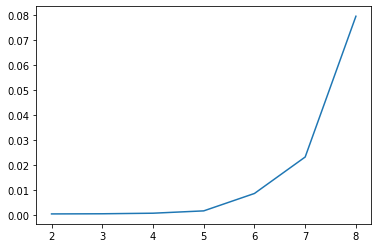

In [27]:
plt.plot(materias_num,tiempos)